In [19]:
import numpy as np
import matplotlib.pyplot as plt
import json

from PIL import Image


## Pre-Processing

In [20]:
# Load in outfit metadata
file = open('../polyvore_outfits/outfits_metadata.json', 'r')
outfit_map = json.load(file)

# Load in image metadata
file = open('../polyvore_outfits/item_metadata.json', 'r')
items_map = json.load(file)

# Load in semantic categories
file = open("../polyvore_outfits/categories.csv")
category_map = {}

for line in file:
    line = line.strip()
    parts = line.split(',')  # Split the line by comma
    category_map[parts[0]] = tuple(parts[1:])

In [21]:
print("Number of items:", len(items_map))
print("Number of outfits:", len(outfit_map))

Number of items: 251008
Number of outfits: 35140


## Display

In [22]:
def displayBoard(key):
    # Size hyperparameters
    num_items = len(outfit_map[key]['items'])
    image_width = 1000

    # Conglomerated info
    concatenated_image = np.zeros((image_width, 0, 3), dtype=np.uint8)
    item_descriptions = []
        
    print("Title:", outfit_map[key]['title'])

    for ids in outfit_map[key]['items']:
        # Get the image
        path = "../polyvore_outfits/images/" + ids['item_id'] + ".jpg"
        image = Image.open(path)

        # Resize
        image = image.resize((image_width, image_width), Image.LANCZOS)
        image_array = np.array(image)
        concatenated_image = np.concatenate((concatenated_image, image_array), axis=1)

        description = items[ids['item_id']]['url_name'] + " (" + items[ids['item_id']]['semantic_category'] + ")"
        item_descriptions.append(description)

    # Display board
    plt.figure(figsize=(image_width * num_items / 100, image_width / 100))  # Adjusted figure size
    plt.imshow(concatenated_image)
    plt.axis('off')
    plt.show()

    print("Items:", item_descriptions)


Title: mermaid for life


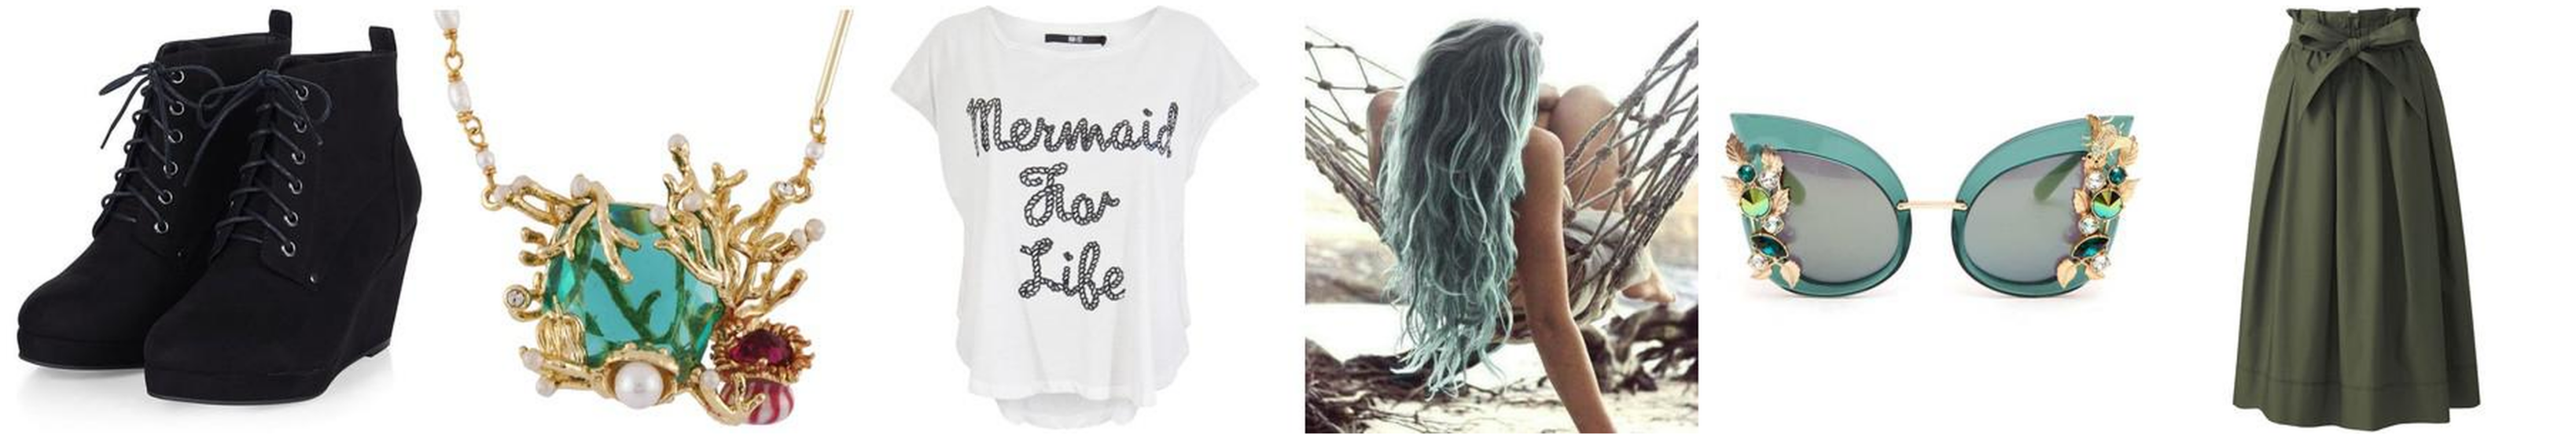

Items: ['black suedette lace up wedge (shoes)', 'les atlantide anemone corals (jewellery)', 'iron fist mermaid for life (tops)', 'blue hair dont care missguided (accessories)', 'dolce gabbana jewlery embellishment botanic (sunglasses)', 'women high waist belted flare (bottoms)']


In [96]:
displayBoard("222049137")

Title: high waisted jeans


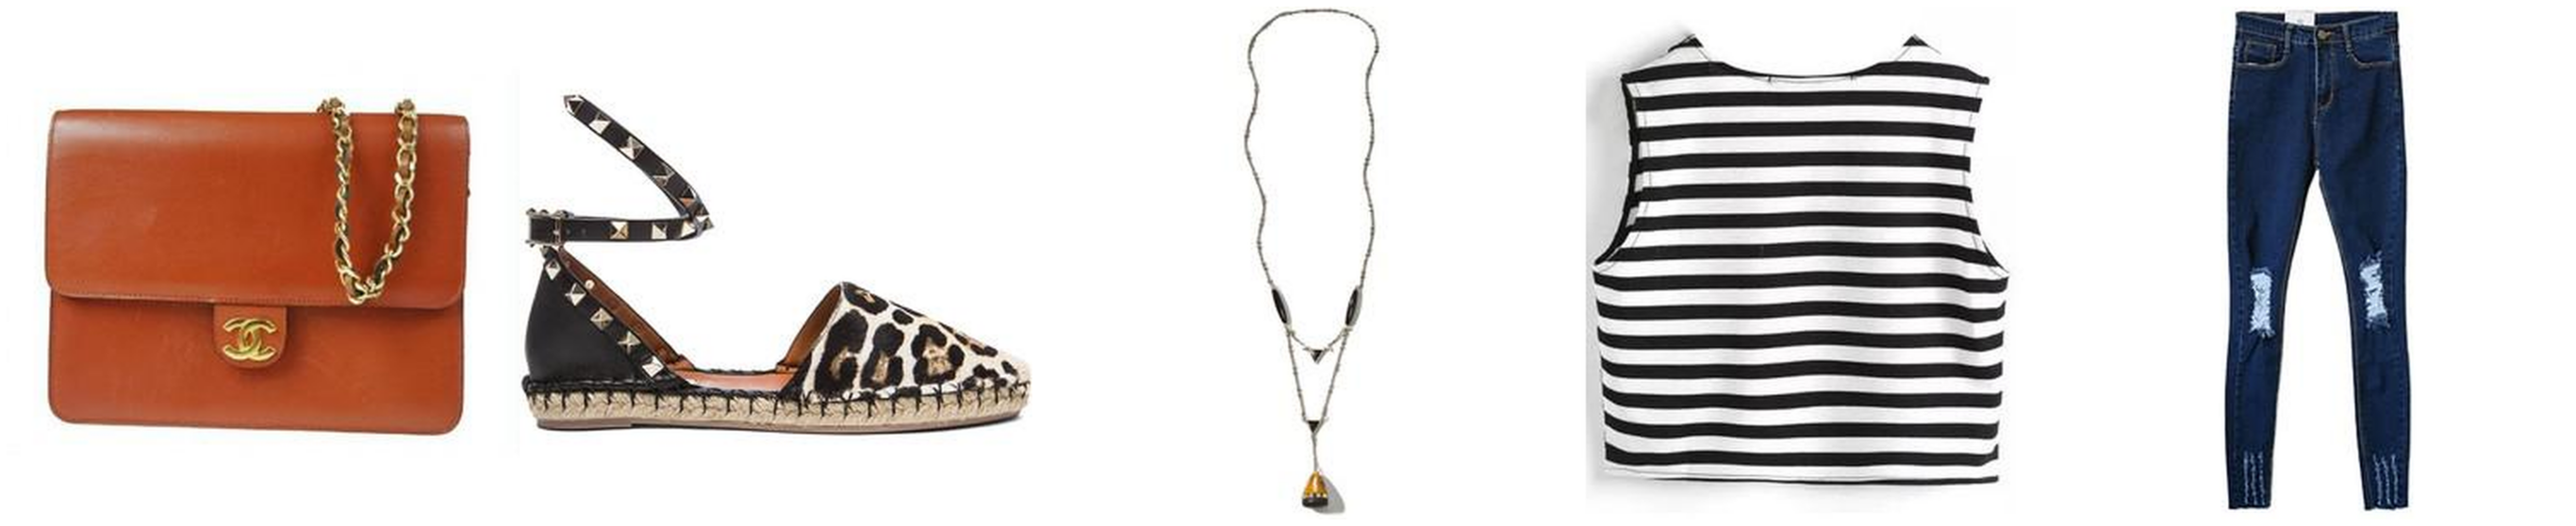

Items: ['chanel vintage brown leather shoulder (bags)', 'valentino cavallino double rockstud leopard (shoes)', 'abercrombie fitch boho beaded necklace (jewellery)', 'lucluc neck casual black white (tops)', 'dark wash ripped knee distressed (bottoms)']


In [97]:
displayBoard("171638917")

Title: off-duty celebrity style


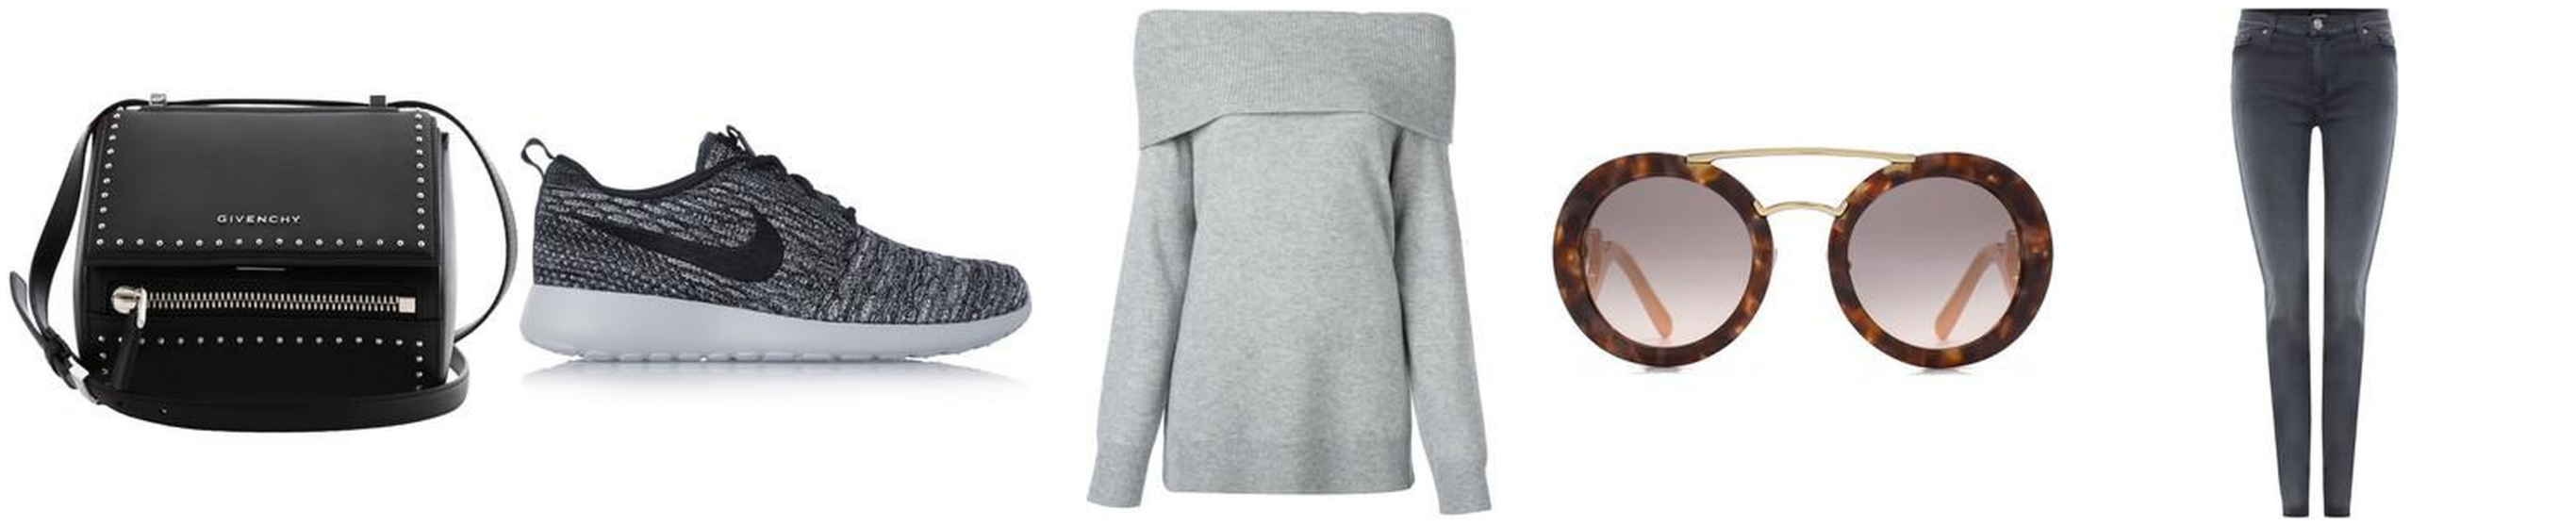

Items: ['pre-owned givenchy mini pandora box (bags)', 'nike roshe one flyknit mesh (shoes)', 'alexander wang off-shoulder jumper (tops)', 'prada baroque round sunglasses (sunglasses)', 'hudson jeans shine mid rise (bottoms)']


In [98]:
displayBoard("209614451")

## Dataset Investigation of Sparsity

In [91]:
semantic_category_counts = {}
url_names, description, categories, related, category_id = 0, 0, 0, 0, 0

for key, value in items_map.items():
    semantic_category = value.get('semantic_category')
    if semantic_category:
        if semantic_category in semantic_category_counts:
            semantic_category_counts[semantic_category] += 1
        else:
            semantic_category_counts[semantic_category] = 1

    if len(value['url_name']) != 0:
        url_names += 1

    if len(value['description']) != 0:
        description += 1

    if len(value['catgeories']) != 0:
        categories += 1

    if len(value['related']) != 0:
        related += 1

    if len(value['category_id']) != 0:
        category_id += 1

# Display the counts
for category, count in semantic_category_counts.items():
    print(f"{category}: {count}", "- {:.0f}%".format((count / len(items_map)) * 100))

# Display percent that have certain descriptions
print()
print("Name", url_names, "- {:.0f}%".format((url_names / len(items_map)) * 100))
print("category_id", category_id, "- {:.0f}%".format((category_id / len(items_map)) * 100))

print("Description", description, "- {:.0f}%".format((description / len(items_map)) * 100))
print("Categories", categories, "- {:.0f}%".format((categories / len(items_map)) * 100))
print("Related", related, "- {:.0f}%".format((related / len(items_map)) * 100))


tops: 32998 - 13%
bottoms: 27670 - 11%
jewellery: 41414 - 16%
shoes: 44850 - 18%
outerwear: 17065 - 7%
scarves: 4898 - 2%
sunglasses: 9874 - 4%
bags: 40717 - 16%
hats: 6071 - 2%
all-body: 18478 - 7%
accessories: 6973 - 3%

Name 251008 - 100%
category_id 251008 - 100%
Description 72152 - 29%
Categories 74852 - 30%
Related 72573 - 29%


In [36]:
undefined = "2"
male = []
female = []
for key, category in category_map.items():
    if key == "2":
        continue
    if "male" in category[0]:
        male.append(key)
    else:
        female.append(key)

undefined_ct, male_ct, female_ct = 0, 0, 0
for key, value in items_map.items():
    category = value.get('category_id')
    if category == undefined:
        undefined_ct += 1
    elif category in male:
        male_ct += 1
    else:
        female_ct += 1

print("Undefined", undefined_ct, undefined_ct / len(items_map))
print("Male", male_ct, male_ct / len(items_map))
print("Female", female_ct, female_ct / len(items_map))

print(1 / (len(male) + len(female) + 1))
print(len(male) / (len(male) + len(female) + 1))
print(len(female) / (len(male) + len(female) + 1))

Undefined 0 0.0
Male 1806 0.007194989801121877
Female 249202 0.9928050101988781
0.006289308176100629
0.27044025157232704
0.7232704402515723


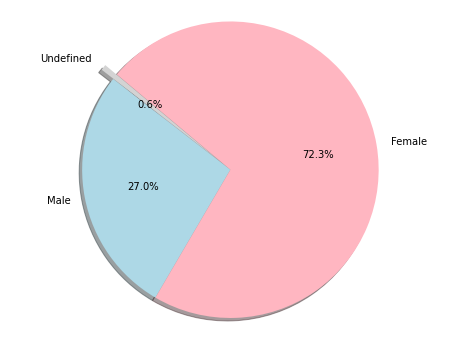

In [39]:
import matplotlib.pyplot as plt

# Data
labels = ['Undefined', 'Male', 'Female']
sizes = [1, len(male), len(female)]  # Replace undefined, male, and female with your actual data
colors = ['lightgray', 'lightblue', 'lightpink']
explode = (0.1, 0, 0)  # explode the 1st slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add title
# plt.title('Distribution of Gender Labels')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.savefig("GenderDistribution")
plt.show()


\begin{figure}[htbp]
  \centering
  \begin{subfigure}{0.45\columnwidth}
    \centering
    \includegraphics[width=\linewidth]{figures/Bit-Vector.png}
    \caption{Bit-Vector Classification Metrics}
    \label{fig:image1}
  \end{subfigure}
  \hfill
  \begin{subfigure}{0.45\columnwidth}
    \centering
    \includegraphics[width=\linewidth]{figures/TF-IDF.png}
    \caption{Caption for Image 2}
    \label{fig:image2}
  \end{subfigure}
  \caption{TF-IDF Classification Metrics}
  \label{fig:tf-idf}
\end{figure}


    \begin{subfigure}[b]{\textwidth}
        \includegraphics[width=\textwidth]{figures/NumberDistribution.png}
        \caption{Distribution of Number of Items in Outfit}
        \label{subfig:numberDistribution}
    \end{subfigure}

In [116]:
title_count = 0
alt_title = 0
lengths = {key: 0 for key in range(20)}


for key, value in outfit_map.items():
    if len(value['title']) != 0:
        title_count += 1
    if len(value['alt_title']) != 0:
        alt_title += 1
    
    lengths[len(value['items'])] += 1

print("Title count", title_count, "- {:.0f}%".format((title_count / len(outfit_map)) * 100))
print("Descriptive Title count", alt_title, "- {:.0f}%".format((alt_title / len(outfit_map)) * 100))
print()

for length, count in lengths.items():
    if count != 0:
        print("Number of items", length, "-", count, "- {:.2f}%".format((count / len(outfit_map)) * 100))


Title count 35140 - 100%
Descriptive Title count 29195 - 83%

Number of items 2 - 1152 - 3.28%
Number of items 3 - 4467 - 12.71%
Number of items 4 - 8393 - 23.88%
Number of items 5 - 9379 - 26.69%
Number of items 6 - 6314 - 17.97%
Number of items 7 - 3233 - 9.20%
Number of items 8 - 1408 - 4.01%
Number of items 9 - 524 - 1.49%
Number of items 10 - 190 - 0.54%
Number of items 11 - 55 - 0.16%
Number of items 12 - 18 - 0.05%
Number of items 13 - 3 - 0.01%
Number of items 14 - 3 - 0.01%
Number of items 16 - 1 - 0.00%


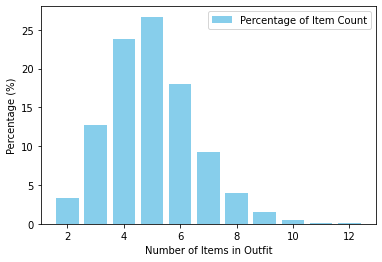

In [18]:
import matplotlib.pyplot as plt

# Data
num_items = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16]
counts = [1152, 4467, 8393, 9379, 6314, 3233, 1408, 524, 190, 55, 18, 3, 3, 1]
percentages = [3.28, 12.71, 23.88, 26.69, 17.97, 9.20, 4.01, 1.49, 0.54, 0.16, 0.05, 0.01, 0.01, 0.00]

# Plot
plt.bar(num_items[:-3], percentages[:-3], color='skyblue')

# Add legend
plt.legend(["Percentage of Item Count"])

# Add labels and title
plt.xlabel('Number of Items in Outfit')
plt.ylabel('Percentage (%)')
# plt.title('Distribution of Items in an Outfit')

# Show plot
plt.savefig("NumberDistribution")
plt.show()


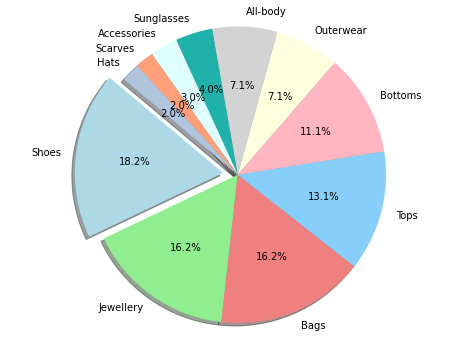

In [17]:
import matplotlib.pyplot as plt

# Data
labels = ['Shoes', 'Jewellery', 'Bags', 'Tops', 'Bottoms', 'Outerwear', 'All-body', 'Sunglasses', 'Accessories', 'Scarves', 'Hats']
sizes = [18, 16, 16, 13, 11, 7, 7, 4, 3, 2, 2]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightgrey', 'lightseagreen', 'lightcyan', 'lightsalmon', 'lightsteelblue']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode the 1st slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add title
# plt.title('Distribution of Polyvore item dataset')

# Adjust space between title and figure
# plt.subplots_adjust(top=1.2)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.savefig("TypeDistribution")

plt.show()